In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/


/content/drive/MyDrive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import torch
import torch.nn as nn

In [5]:
%cd Colab Notebooks/


/content/drive/MyDrive/Colab Notebooks


In [6]:
data = pd.read_csv('AMZN.csv')

In [7]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6511,2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
6512,2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
6513,2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700
6514,2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48662500


In [8]:
data = data[['Date','Close']]

In [9]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [10]:
device

'cpu'

In [11]:
data['Date'] = pd.to_datetime(data['Date'])

<ipython-input-11-1a72a8b5b870>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


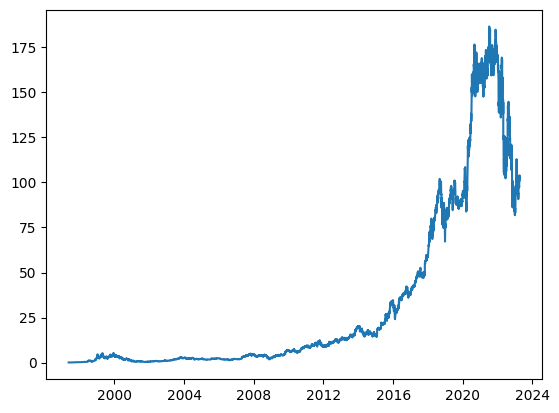

In [12]:
plt.plot(data['Date'],data['Close'])

In [13]:
from copy import deepcopy as dc

In [14]:
def prepare_dataframe_for_lstm(df, n_steps):
  df = dc(df)

  df.set_index('Date',inplace=True)

  for i in range(1, n_steps+1):
    df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)

  return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(data, lookback)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
1997-06-25,0.075521,0.075521,0.075000,0.076302,0.075521,0.075521,0.075260,0.078646
1997-06-26,0.075521,0.075521,0.075521,0.075000,0.076302,0.075521,0.075521,0.075260
1997-06-27,0.074479,0.075521,0.075521,0.075521,0.075000,0.076302,0.075521,0.075521
1997-06-30,0.077083,0.074479,0.075521,0.075521,0.075521,0.075000,0.076302,0.075521
1997-07-01,0.075781,0.077083,0.074479,0.075521,0.075521,0.075521,0.075000,0.076302
...,...,...,...,...,...,...,...,...
2023-03-30,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001
2023-03-31,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997
2023-04-03,102.410004,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999


In [15]:
shifted_df_as_numpy = shifted_df.to_numpy()

shifted_df_as_numpy

array([[7.55210000e-02, 7.55210000e-02, 7.50000000e-02, ...,
        7.55210000e-02, 7.52600000e-02, 7.86460000e-02],
       [7.55210000e-02, 7.55210000e-02, 7.55210000e-02, ...,
        7.55210000e-02, 7.55210000e-02, 7.52600000e-02],
       [7.44790000e-02, 7.55210000e-02, 7.55210000e-02, ...,
        7.63020000e-02, 7.55210000e-02, 7.55210000e-02],
       ...,
       [1.02410004e+02, 1.03290001e+02, 1.02000000e+02, ...,
        9.80400010e+01, 9.81299970e+01, 9.87099990e+01],
       [1.03949997e+02, 1.02410004e+02, 1.03290001e+02, ...,
        9.72399980e+01, 9.80400010e+01, 9.81299970e+01],
       [1.01099998e+02, 1.03949997e+02, 1.02410004e+02, ...,
        1.00250000e+02, 9.72399980e+01, 9.80400010e+01]])

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
shifted_df_as_numpy = scaler.fit_transform(shifted_df_as_numpy)

In [17]:
shifted_df_as_numpy

array([[-0.99998883, -0.99998883, -0.99999441, ..., -0.99998883,
        -0.99999162, -0.99995531],
       [-0.99998883, -0.99998883, -0.99998883, ..., -0.99998883,
        -0.99998883, -0.99999162],
       [-1.        , -0.99998883, -0.99998883, ..., -0.99998045,
        -0.99998883, -0.99998883],
       ...,
       [ 0.09745534,  0.10689251,  0.09305842, ...,  0.05059104,
         0.05155616,  0.05777616],
       [ 0.11397036,  0.09745534,  0.10689251, ...,  0.04201173,
         0.05059104,  0.05155616],
       [ 0.08340672,  0.11397036,  0.09745534, ...,  0.07429126,
         0.04201173,  0.05059104]])

In [18]:
x = shifted_df_as_numpy[:,1:]

y = shifted_df_as_numpy[:,0]

x.shape, y.shape

((6488, 7), (6488,))

In [19]:
x = dc(np.flip(x,axis = 1))
x

array([[-0.99995531, -0.99999162, -0.99998883, ..., -0.99998045,
        -0.99999441, -0.99998883],
       [-0.99999162, -0.99998883, -0.99998883, ..., -0.99999441,
        -0.99998883, -0.99998883],
       [-0.99998883, -0.99998883, -0.99998045, ..., -0.99998883,
        -0.99998883, -0.99998883],
       ...,
       [ 0.05777616,  0.05155616,  0.05059104, ...,  0.07429126,
         0.09305842,  0.10689251],
       [ 0.05155616,  0.05059104,  0.04201173, ...,  0.09305842,
         0.10689251,  0.09745534],
       [ 0.05059104,  0.04201173,  0.07429126, ...,  0.10689251,
         0.09745534,  0.11397036]])

In [20]:
x.shape

(6488, 7)

In [21]:
split_index = int(len(x)*0.95)

split_index

6163

In [22]:
x_train = x[:split_index]
x_test = x[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6163, 7), (325, 7), (6163,), (325,))

In [24]:
x_train = x_train.reshape((-1,lookback,1))
x_test = x_test.reshape((-1,lookback,1))

y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6163, 7, 1), (325, 7, 1), (6163, 1), (325, 1))

In [25]:
x_train = torch.tensor(x_train).float()
x_test = torch.tensor(x_test).float()
y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()

In [26]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([6163, 7, 1]),
 torch.Size([325, 7, 1]),
 torch.Size([6163, 1]),
 torch.Size([325, 1]))

In [27]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
  def __init__(self,x,y):
    self.x = x
    self.y = y

  def __len__(self):
    return len(self.x)

  def __getitem__(self,i):
    return self.x[i],self.y[i]

train_dataset = TimeSeriesDataset(x_train, y_train)
test_dataset = TimeSeriesDataset(x_test, y_test)

In [28]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size = batch_size,shuffle = True)

test_loader = DataLoader(test_dataset, batch_size = batch_size,shuffle = False)

In [29]:
for _, batch in enumerate(train_loader):
  x_batch, y_batch = batch[0].to(device), batch[1].to(device)
  print(x_batch.shape,y_batch.shape)
  break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [30]:
class LSTM(nn.Module):
  def __init__(self, input_size, hidden_size, num_stacked_layers):
    super().__init__()

    self.hidden_size = hidden_size
    self.num_stacked_layers = num_stacked_layers

    self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, batch_first = True)
    self.fc = nn.Linear(hidden_size, 1)

  def forward(self, x):
    batch_size = x.size(0)
    # gate vectors that need to be initialized for the LSTM
    h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
    c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
    out, _ = self.lstm(x,(h0,c0))
    out = self.fc(out[:,-1,:])
    return out

model = LSTM(1,4,1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [31]:
def train_one_epoch():
  model.train(True)
  print(f'Epoch:{epoch+1}')
  running_loss = 0.0

  for batch_index, batch in enumerate(train_loader):
    x_batch,y_batch = batch[0].to(device),batch[1].to(device)

    output = model(x_batch)
    loss = loss_function(output, y_batch)
    running_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch_index % 100 == 99: # print every 100 batches
      avg_loss_across_batches = running_loss/100
      print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,avg_loss_across_batches))

      running_loss=0.0

  print()

In [32]:
def validate_one_epoch():
  model.train(False)
  running_loss = 0.0

  for batch_index,batch in enumerate(test_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)

    with torch.no_grad():
      output = model(x_batch)
      loss = loss_function(output,y_batch)
      running_loss += loss.item()

  avg_loss_across_batches = running_loss/ len(test_loader)

  print('val loss:{0:.3f}'.format(avg_loss_across_batches))
  print("************************************************")

  print()

In [34]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()



Epoch:1
Batch 100, Loss: 0.166
Batch 200, Loss: 0.088
Batch 300, Loss: 0.045

val loss:0.050
************************************************

Epoch:2
Batch 100, Loss: 0.010
Batch 200, Loss: 0.006
Batch 300, Loss: 0.003

val loss:0.015
************************************************

Epoch:3
Batch 100, Loss: 0.002
Batch 200, Loss: 0.002
Batch 300, Loss: 0.001

val loss:0.009
************************************************

Epoch:4
Batch 100, Loss: 0.001
Batch 200, Loss: 0.001
Batch 300, Loss: 0.000

val loss:0.005
************************************************

Epoch:5
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

val loss:0.004
************************************************

Epoch:6
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

val loss:0.004
************************************************

Epoch:7
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

val loss:0.004
************************************************


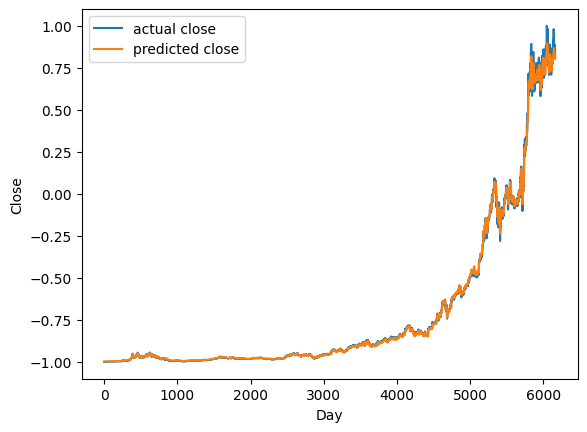

In [36]:
with torch.no_grad():
  predicted = model(x_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label = "actual close")
plt.plot(predicted, label = 'predicted close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [37]:
train_predictions = predicted.flatten()

dummies = np.zeros((x_train.shape[0], lookback+1))
dummies[:,0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:,0])
train_predictions

array([  0.33028106,   0.33021436,   0.33021436, ..., 168.95175702,
       168.96723053, 168.39726727])

In [39]:
dummies = np.zeros((y_train.shape[0],lookback+1))
dummies[:,0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:,0])
new_y_train

array([7.55183487e-02, 7.55183487e-02, 7.44790000e-02, ...,
       1.73315004e+02, 1.68871005e+02, 1.70017501e+02])

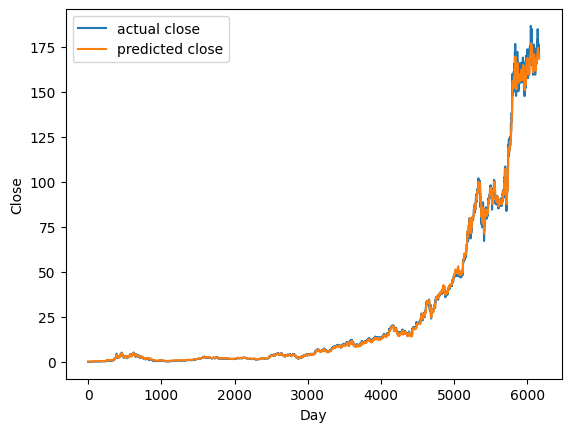

In [40]:
plt.plot(new_y_train, label = "actual close")
plt.plot(train_predictions, label = 'predicted close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
test_predictions = model(x_test.to(device)).detach().cpu().numpy().flatten()
dummies = np.zeros((x_test.shape[0],lookback+1))
dummies[:,0]=test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:,0])
test_predictions

In [51]:
y_test.shape

torch.Size([325, 1])

In [52]:
dummies = np.zeros((y_test.shape[0],lookback+1))
dummies

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
dummies[:,0]= y_test.flatten()
dummies

array([[0.7909714 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.82676852, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.83341742, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.09745534, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11397036, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08340672, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [54]:
dummies = scaler.inverse_transform(dummies)
dummies

array([[167.07899518,  93.3224875 ,  93.3224875 , ...,  93.3224875 ,
         93.3224875 ,  93.3224875 ],
       [170.41700525,  93.3224875 ,  93.3224875 , ...,  93.3224875 ,
         93.3224875 ,  93.3224875 ],
       [171.03700176,  93.3224875 ,  93.3224875 , ...,  93.3224875 ,
         93.3224875 ,  93.3224875 ],
       ...,
       [102.41000365,  93.3224875 ,  93.3224875 , ...,  93.3224875 ,
         93.3224875 ,  93.3224875 ],
       [103.94999675,  93.3224875 ,  93.3224875 , ...,  93.3224875 ,
         93.3224875 ,  93.3224875 ],
       [101.09999772,  93.3224875 ,  93.3224875 , ...,  93.3224875 ,
         93.3224875 ,  93.3224875 ]])

In [56]:
new_y_test = dc(dummies[:,0])
new_y_test

array([167.07899518, 170.41700525, 171.03700176, 171.06849902,
       169.66949677, 170.66099652, 169.20100618, 168.64449887,
       166.71699614, 170.40449416, 167.52200227, 164.35699652,
       163.25399744, 162.55399887, 161.48599305, 165.36200225,
       165.20700034, 161.21400606, 162.13799817, 158.91749564,
       156.29899833, 151.66749379, 142.64300691, 144.54400347,
       139.98599256, 138.87249717, 139.63749672, 143.97799751,
       149.57350074, 151.19349521, 150.61250484, 138.84550467,
       157.63949692, 157.93550009, 161.41349987, 161.18950077,
       159.0034948 , 153.29350203, 155.16700864, 156.51049745,
       158.10049531, 154.65249769, 152.60150144, 150.19749346,
       144.82699533, 151.35800132, 153.78849879, 153.56300459,
       151.1420002 , 152.05250301, 147.89849861, 145.64100545,
       137.45300252, 136.01449668, 139.27900757, 146.81750371,
       145.52450391, 141.8529963 , 147.36650214, 153.10400152,
       157.23899751, 161.25050554, 161.49150105, 164.88

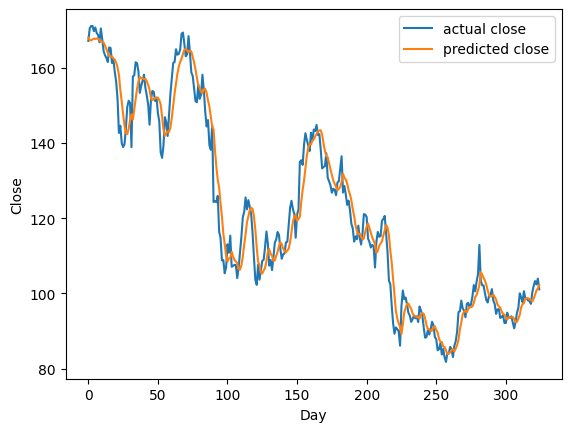

In [57]:
plt.plot(new_y_test, label = "actual close")
plt.plot(test_predictions, label = 'predicted close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()